# Cognitive Geometry Paper
## Figure 4
Selection of plots demonstrating an infodesic  {0, 12, 6}.
* grid: 7 x 7 Moore
* beta: 100
* data files:
    * $\beta = 100$:  "data-7-7-moo-liv-det-1.0-b-100-Z.pickle"

In [1]:
from env.grid_room import GridRoom
from utility import display as di

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import networkx as nx
import numpy as np
import pickle
import os

from collections import Counter

In [3]:
os.chdir("../../../data/7-7-det")

In [4]:
sample_size = 100_000

In [5]:
# extract data from pickle file
filename = "data-7-7-moo-liv-det-1.0-b-100-Z.pickle"

# standard loop to load pickle file
with open(filename, 'rb') as infile:
    data_dict = pickle.load(infile)

env = data_dict['env'] # gridworld parameters
shape = data_dict['shape'] # shape of the grid world
theta = data_dict['theta'] # threshold for convergence
beta = data_dict['beta'] # trade-off parameter
state_dist = data_dict['state_dist'] # state distribution object used in the simulation

infos = data_dict['infos'] # decision information values
frees = data_dict['frees'] # free energy values
policies = data_dict['policies'] # corresponding free energy optimal policies

Additional plot showing information heat map with the policy distribution for goal in state 6 using the data stored in the pickle data file.

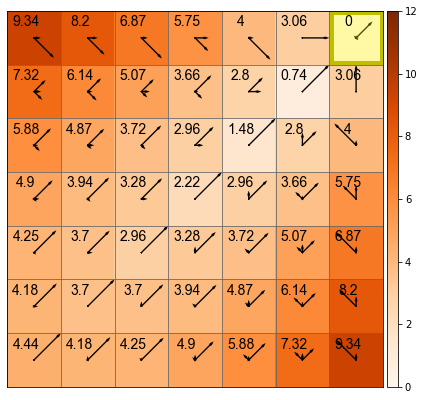

In [6]:
g = 6
env.update_dynamics_for_goals([g])
exp_desc = '{}-{}-{:.3}-{:.3}-det-{}-{}'.format(shape[0],shape[1], 'moo', state_dist.name.lower(), env.determinism, 'ides-0-12-6')
I = infos[g]
pi = policies[g]
di.plot_quiver_heatmap_var(env, I, pi, label=True, clim=(0,12), filename='grid_itg-{}-beta-{}.pdf'.format(exp_desc, beta));

## Figure 4 A:
Same policy as information plot above with live distribution displayed as heat map.

In [7]:
from planning.state_distribution import LiveStateDistribution
# calculate the state distribution for policies[6]
ps = state_dist.set_ps(pi)

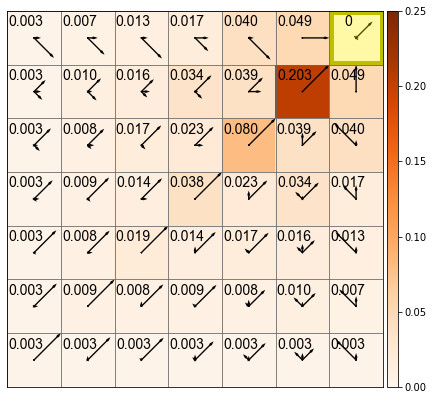

In [8]:
di.plot_quiver_heatmap_var(env, ps, pi, label=True, clim=(0,0.25)
                           , filename='grid_itg-{}-beta-{}-ps.pdf'.format(exp_desc, beta));


### Actual trajectories

Plot of the cumulative visits of an agent to each state across 10,000 trajectories sampled from the policy indicated scaled by the number of trajectories. The starting state of the agent is drawn from a uniform distribution. 

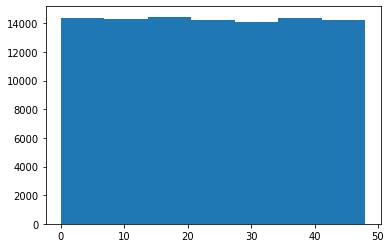

In [9]:
# select starting state from the initial state distribution (env.isd)
isd_samples = np.random.choice(env.nS, sample_size, p=env.isd)
plt.hist(isd_samples, bins=env.shape[0]);

In [10]:
# sample the trajectories given the policy
isd_trajectories = []
for s in isd_samples:
    isd_trajectories.append(env.get_state_sequence(s, g, pi))

In [11]:
# count the number of times an agent visits each state for each trajectory
isd_trajectory_state_counts = list(map(Counter, isd_trajectories))
states_visited = {s for cnt in isd_trajectory_state_counts for s in cnt}      # use a set because this removes duplicates
dict_cumulative_visits = {s: sum([cnt[s] for cnt in isd_trajectory_state_counts]) for s in states_visited}
# print(dict_cumulative_visits)

In [12]:
# plot the number of visits to each state scaled by the number of trajectories
cumulative_visits = np.zeros(env.nS)
for s in dict_cumulative_visits.keys():
    cumulative_visits[s] = dict_cumulative_visits[s]
# print(cumulative_visits.reshape(env.shape))


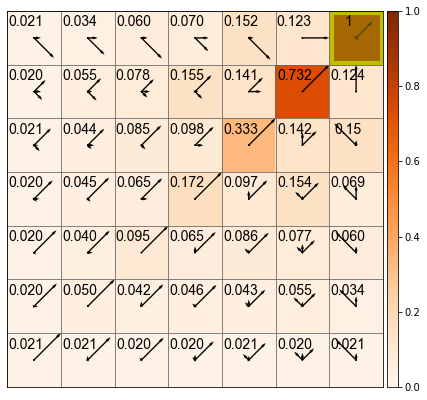

In [13]:
di.plot_quiver_heatmap_var(env, cumulative_visits/sample_size, pi, label=True, clim=(0,1), filename='grid_itg-{}-beta-{}-isd-traj.pdf'.format(exp_desc, beta));

Remove the visits to the goal state and normalise.  Shows that even though the grid world is rather small, the actual state distribution approaches the live distribution.

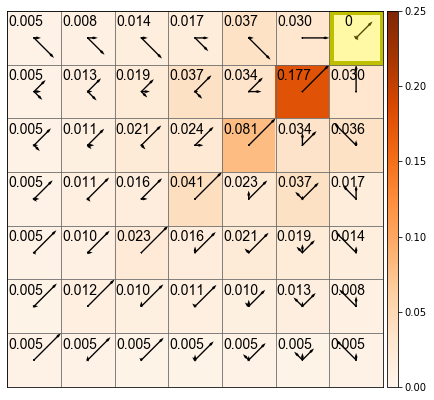

In [14]:
cumulative_visits[g]=0
total_visits = sum(cumulative_visits)
di.plot_quiver_heatmap_var(env, cumulative_visits/total_visits, pi, label=True, clim=(0,0.25), filename='grid_itg-{}-beta-{}-isd-traj.pdf'.format(exp_desc, beta));


## Figure 4B:

Considering the infodesic $S_0=\#0 \to S_T=g$, i.e. known starting state, show the percentage of trajectories which pass through each state.  This is only using a single policy.

In [15]:
# sample the trajectories from a given state given the policy
ides_trajectories = []
for _ in range(sample_size):
    ides_trajectories.append(env.get_state_sequence(0, g, pi))
ides_trajectory_state_counts = list(map(Counter,ides_trajectories))
states_visited = {s for cnt in ides_trajectory_state_counts for s in cnt} 

In [16]:
cumulative_trajectories = np.zeros(env.nS)
for s in states_visited:
    cumulative_trajectories[s] = np.sum([np.sum([x == s for x in list(cnt.keys())]) for cnt in ides_trajectory_state_counts])/sample_size
# print(cumulative_trajectories.reshape(env.shape))

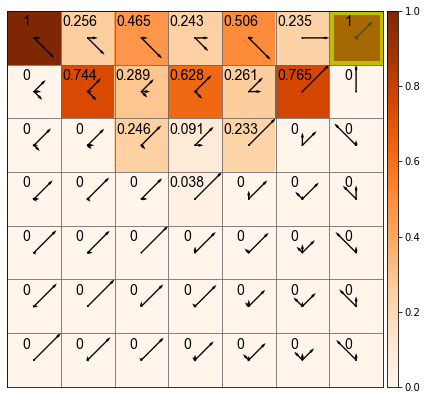

In [17]:
di.plot_quiver_heatmap_var(env, cumulative_trajectories, pi, label=True, clim=(0,1), filename='grid_itg-{}-beta-{}-ides-traj.pdf'.format(exp_desc, beta));

## Figure 4D:

Now we implement subgoalling and allow policy switching for the same start and goal states, i.e. $S_0=\#0 \to S_T=g$.  We consider two segments $S_0=\#0 \to S_1=\#12$ following free energy optimal policy $\pi_\mathcal{F}^{(1)}$ and $S_1=\#12 \to S_T=\#$ following free energy optimal policy $\pi_\mathcal{F}^{(2)}$.  Again we aggregate empirical trajectories and plot the percentage of trajectories which pass through each state. 

## First segment
 $S_0=\#0 \to S_1=\#12$

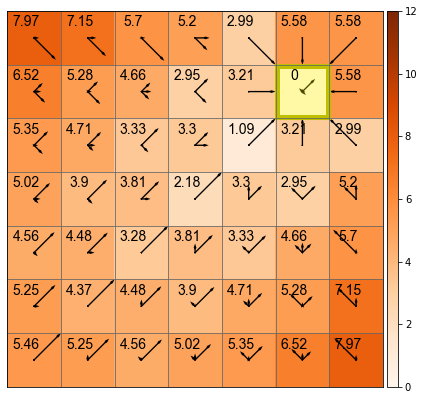

In [18]:
g = 12
s = 0
env.update_dynamics_for_goals([g])
exp_desc = '{}-{}-{:.3}-{:.3}-det-{}-{}'.format(shape[0],shape[1], 'moo', state_dist.name.lower(), env.determinism, 'ides-seg1-0-12')
I = infos[g]
pi = policies[g]
di.plot_quiver_heatmap_var(env, I, pi, label=True, clim=(0,12), filename='grid_itg-{}-beta-{}.pdf'.format(exp_desc, beta));

In [19]:
# sample the trajectories from a given state given the policy
sample_size = 1000
ides_seg1_trajectories = []
for _ in range(sample_size):
    ides_seg1_trajectories.append(env.get_state_sequence(s, g, pi))
ides_trajectory_state_counts = list(map(Counter,ides_seg1_trajectories))
states_visited = {s for cnt in ides_trajectory_state_counts for s in cnt} 

In [20]:
cumulative_trajectories = np.zeros(env.nS)
for s in states_visited:
    cumulative_trajectories[s] = np.sum([np.sum([x == s for x in list(cnt.keys())]) for cnt in ides_trajectory_state_counts])/sample_size
# print(cumulative_trajectories.reshape(env.shape))

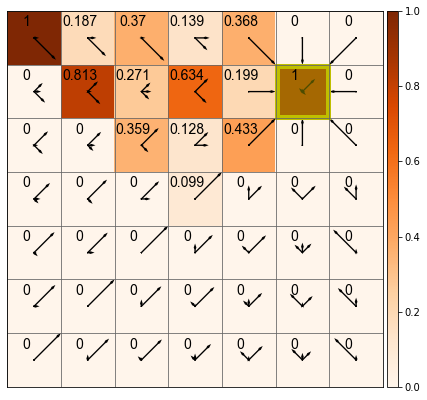

In [21]:
di.plot_quiver_heatmap_var(env, cumulative_trajectories, pi, label=True, clim=(0,1), filename='grid_itg-{}-beta-{}-ides-traj.pdf'.format(exp_desc, beta));

## Second segment
 $S_1=\#12 \to S_T=\#6$

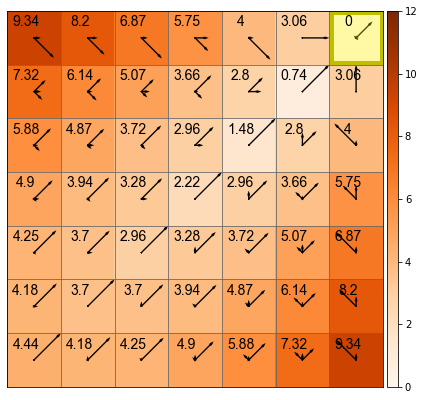

In [22]:
g = 6
s = 12
env.update_dynamics_for_goals([g])
exp_desc = '{}-{}-{:.3}-{:.3}-det-{}-{}'.format(shape[0],shape[1], 'moo', state_dist.name.lower(), env.determinism, 'ides-seg2-12-6')
I = infos[g]
pi = policies[g]
di.plot_quiver_heatmap_var(env, I, pi, label=True, clim=(0,12), filename='grid_itg-{}-beta-{}.pdf'.format(exp_desc, beta));

In [23]:
# sample the trajectories from a given state given the policy
sample_size = 1000
ides_seg2_trajectories = []
for _ in range(sample_size):
    ides_seg2_trajectories.append(env.get_state_sequence(s, g, pi))
ides_trajectory_state_counts = list(map(Counter, ides_seg2_trajectories))
states_visited = {s for cnt in ides_trajectory_state_counts for s in cnt} 

In [24]:
cumulative_trajectories = np.zeros(env.nS)
for s in states_visited:
    cumulative_trajectories[s] = np.sum([np.sum([x == s for x in list(cnt.keys())]) for cnt in ides_trajectory_state_counts])/sample_size
# print(cumulative_trajectories.reshape(env.shape))

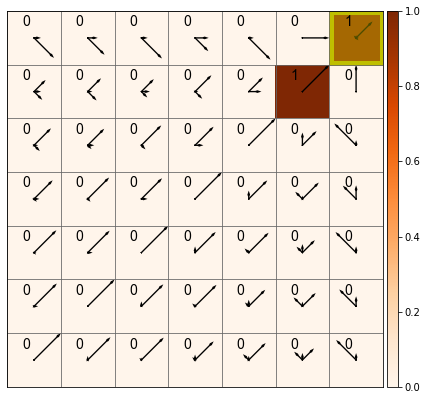

In [25]:
di.plot_quiver_heatmap_var(env, cumulative_trajectories, pi, label=True, clim=(0,1), filename='grid_itg-{}-beta-{}-ides-traj.pdf'.format(exp_desc, beta));

## Figure 4 C:
Graph plot to show where the infodesic states are, use similar colour but identify states using outline and shapes.

In [26]:
node_colours = [di.graph_cmap(i)[0:3] for i in di.select_state_colours(shape)]
node_colour_dict = {i: {'color': node_colours[i]} for i in env.G.nodes}
nx.set_node_attributes(env.G, node_colour_dict)
path=(0,12,6)

<module 'matplotlib.pyplot' from '/home/ka16abr/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

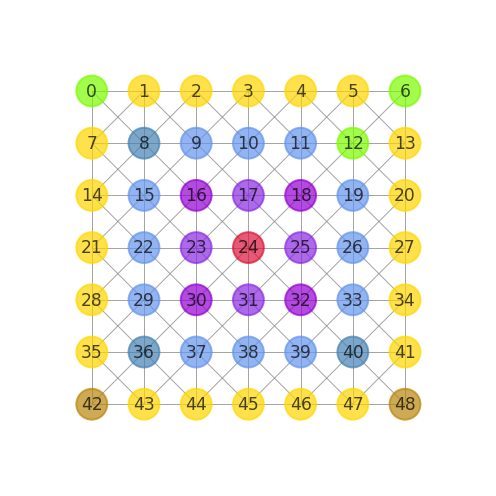

In [27]:
seq_colors = [mcolors.cnames['lawngreen'] if n in path else node_colours[n] for n in env.G.nodes()]
di.plot_sequence(shape, env.G, path)